<h1>Workcamp Maschinelles Lernen - 11.12.2017</h1>
# Maschinelles Lernen in Python
## an einem  Beispiel: *California Housing* - Wir bestimmen die Bestimmungsfaktoren
## für Hauspreise in Kalifornien - Spielt ein Tesla eine Rolle ?


In [29]:
# Laden der Bibliotheken numpy, pandas und matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Einen %magic Befehl ausführen
% pylab inline 
# %matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
#Aus der scikit learn bibliothek werden module geladen
from sklearn import base, pipeline, preprocessing
from sklearn import svm, linear_model, tree, ensemble, neighbors

In [15]:
df_file = pd.read_csv("california_housing.csv")
Xtrain = df_file[df_file["sample_id"] == 0].copy()
ytrain = np.asarray(Xtrain["y"]).copy()
del(Xtrain["sample_id"], Xtrain["y"])
Xtest = df_file[df_file["sample_id"] == 1].copy()
ytest = np.asarray(Xtest["y"]).copy()
del(Xtest["sample_id"], Xtest["y"])
df_file.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,y,sample_id
0,3.3926,32.0,5.575439,1.063743,4951.0,2.895322,38.60,-121.30,1.034,0.0
1,2.3571,52.0,6.008130,1.067751,907.0,2.457995,40.58,-124.26,1.114,0.0
2,6.2885,6.0,6.909449,1.102362,664.0,2.614173,35.47,-118.92,2.164,0.0
3,3.6618,36.0,4.483660,0.964052,774.0,2.529412,34.22,-118.43,1.873,0.0
4,1.2778,42.0,3.461538,1.149798,890.0,3.603239,34.00,-118.28,1.125,0.0


In [26]:
df_file.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,y,sample_id
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558,0.250000
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956,0.433023
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990,0.000000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000,0.000000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000,0.000000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250,0.250000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010,1.000000


#### Laden der Daten (Trainings- und Validierungsdatensatz)

In [6]:
#from utilities import load_data
#Xtrain, ytrain, Xtest, ytest = load_data()
Xtrain.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,3.3926,32.0,5.575439,1.063743,4951.0,2.895322,38.60,-121.30
1,2.3571,52.0,6.008130,1.067751,907.0,2.457995,40.58,-124.26
2,6.2885,6.0,6.909449,1.102362,664.0,2.614173,35.47,-118.92
3,3.6618,36.0,4.483660,0.964052,774.0,2.529412,34.22,-118.43
4,1.2778,42.0,3.461538,1.149798,890.0,3.603239,34.00,-118.28


In [7]:
Xtrain.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
15475,1.7823,17.0,4.055046,1.087156,1079.0,2.474771,33.76,-117.88
15476,8.5608,42.0,6.788462,1.011538,753.0,2.896154,34.42,-119.63
15477,1.1326,42.0,4.890785,1.006826,775.0,2.645051,33.93,-118.26
15478,2.6322,10.0,4.991614,0.951782,1323.0,2.773585,33.73,-117.16
15479,2.3036,35.0,4.620513,1.176923,1009.0,2.587179,37.79,-122.20


In [8]:
Xtrain.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000
mean,3.878820,28.587403,5.437817,1.097580,1424.472222,3.110072,35.634796,-119.576839
std,1.887916,12.589381,2.555671,0.494610,1120.580509,11.976240,2.138442,2.008542
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.750000,32.540000,-124.300000
25%,2.574200,18.000000,4.444780,1.006338,787.000000,2.429666,33.930000,-121.810000
50%,3.547700,29.000000,5.233703,1.048996,1164.000000,2.815513,34.260000,-118.500000
75%,4.762500,37.000000,6.065314,1.099569,1722.000000,3.273776,37.712500,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [9]:
ytrain

array([ 1.034,  1.114,  2.164, ...,  1.048,  1.407,  1.26 ])

In [10]:
Xtest.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
15480,3.2500,39.0,4.503205,1.073718,1109.0,1.777244,34.06,-118.36
15481,1.9784,37.0,4.988584,1.038813,1143.0,2.609589,36.78,-119.78
15482,4.0132,46.0,4.480296,1.012315,1534.0,3.778325,37.73,-122.42
15483,1.5208,52.0,3.908046,1.114943,200.0,2.298851,37.81,-122.28
15484,5.1795,37.0,5.406360,1.024735,711.0,2.512367,33.82,-118.13


In [11]:
Xtest.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000
mean,3.846224,28.795736,5.402547,1.093960,1428.490310,2.952403,35.623058,-119.548302
std,1.935078,12.574004,2.211756,0.405556,1167.487325,1.085162,2.128649,1.988464
min,0.499900,2.000000,1.130435,0.375000,11.000000,0.692308,32.550000,-124.350000
25%,2.531425,18.000000,4.427069,1.005044,786.000000,2.430186,33.940000,-121.740000
50%,3.506950,29.000000,5.218858,1.048000,1175.000000,2.830037,34.250000,-118.490000
75%,4.708300,37.000000,6.014514,1.099489,1731.250000,3.308800,37.710000,-118.007500
max,15.000100,52.000000,62.422222,14.111111,28566.000000,51.400000,41.860000,-114.490000


In [12]:
ytest

array([ 3.55 ,  0.707,  2.294, ...,  0.588,  2.108,  0.875])

#### Plotten der Verteilung der Trainingsdaten

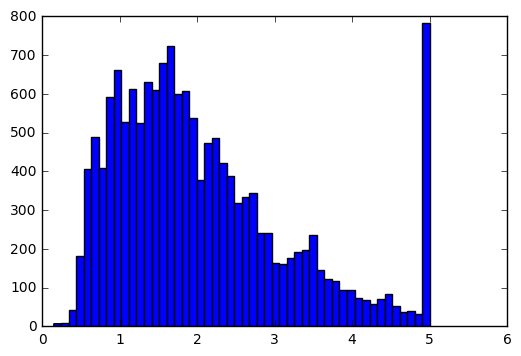

In [13]:
plt.hist(ytrain, bins=50)
plt.show()

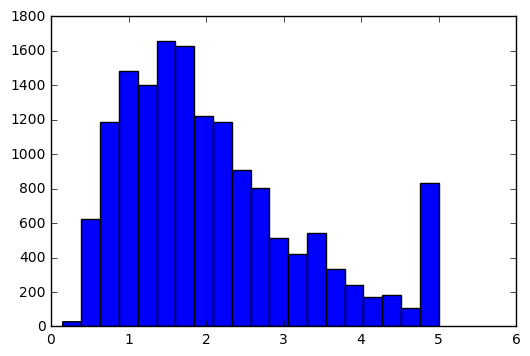

In [14]:
plt.hist(ytrain, bins=20)
plt.show()

### Einfaches Modell: Mittelwert

Mittlere absolute Abweichung: 0.90993078959
Mittlere quadratische Abweichung: 1.31739829119


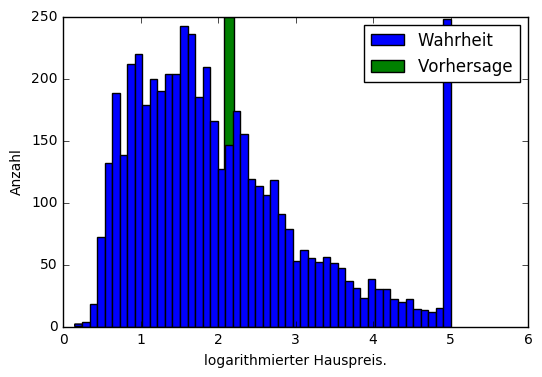

In [22]:
#from utilities import evaluate
#from utilities import evaluate
trivialprognose = np.mean(ytrain)
prediction = trivialprognose
#Plot der Daten
truth = ytest
#evaluate(trivialprognose, ytest)
if isinstance(prediction, np.ndarray):
    p = plt.hist(prediction, bins=50, color="g", label='Vorhersage')
else:
    p = plt.bar(prediction, 250, width=0.125, color="g", label='Vorhersage')
t = plt.hist(truth, bins=50, color="b", label='Wahrheit')
plt.ylabel("Anzahl")
plt.xlabel("logarithmierter Hauspreis.")
plt.legend()
print("Mittlere absolute Abweichung: {}".format(np.mean(np.abs(prediction - truth))))
print("Mittlere quadratische Abweichung: {}".format(np.mean(np.square(prediction - truth))))

## Modell A: Lineare Regression


Mittlere absolute Abweichung: 0.535100844528
Mittlere quadratische Abweichung: 0.535653284542


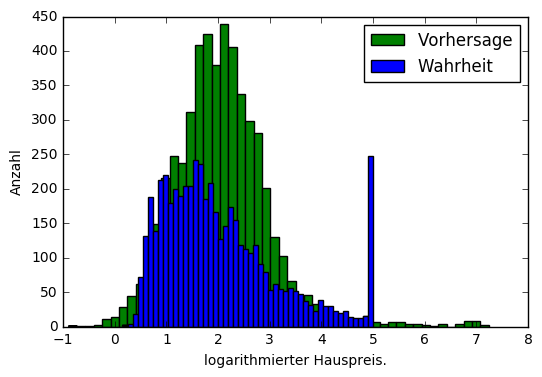

In [23]:
from sklearn.linear_model import LinearRegression

est = LinearRegression()

est.fit(Xtrain, ytrain)
prediction = est.predict(Xtest)
#Plot der Daten
truth=ytest

if isinstance(prediction, np.ndarray):
    p = plt.hist(prediction, bins=50, color="g", label='Vorhersage')
else:
    p = plt.bar(prediction, 250, width=0.125, color="g", label='Vorhersage')
t = plt.hist(truth, bins=50, color="b", label='Wahrheit')
plt.ylabel("Anzahl")
plt.xlabel("logarithmierter Hauspreis.")
plt.legend()
print("Mittlere absolute Abweichung: {}".format(np.mean(np.abs(prediction - truth))))
print("Mittlere quadratische Abweichung: {}".format(np.mean(np.square(prediction - truth))))

#evaluate(prediction, ytest)

## Modell B: Support Vektor Regression


C:\Users\ramon\Anaconda2\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Mittlere absolute Abweichung: 0.822014212648
Mittlere quadratische Abweichung: 1.17762458123


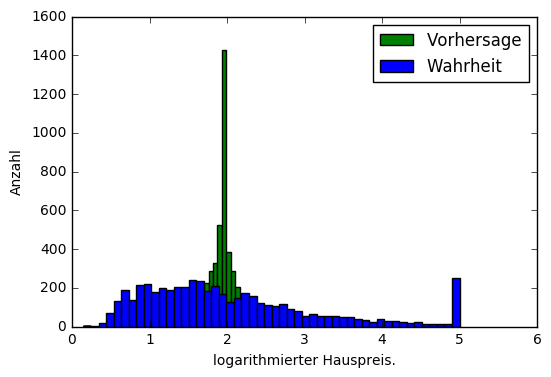

In [24]:
from sklearn.svm import SVR

est = SVR(max_iter=5000)
est.fit(Xtrain, ytrain)

prediction = est.predict(Xtest)
#Plot der Daten
truth = ytest
if isinstance(prediction, np.ndarray):
    p = plt.hist(prediction, bins=50, color="g", label='Vorhersage')
else:
    p = plt.bar(prediction, 250, width=0.125, color="g", label='Vorhersage')
t = plt.hist(truth, bins=50, color="b", label='Wahrheit')
plt.ylabel("Anzahl")
plt.xlabel("logarithmierter Hauspreis.")
plt.legend()
print("Mittlere absolute Abweichung: {}".format(np.mean(np.abs(prediction - truth))))
print("Mittlere quadratische Abweichung: {}".format(np.mean(np.square(prediction - truth))))
#evaluate(prediction, ytest)

## Modell B durch Erweiterung mit Skalierungsverfahren


Mittlere absolute Abweichung: 0.422506246209
Mittlere quadratische Abweichung: 0.396905478126


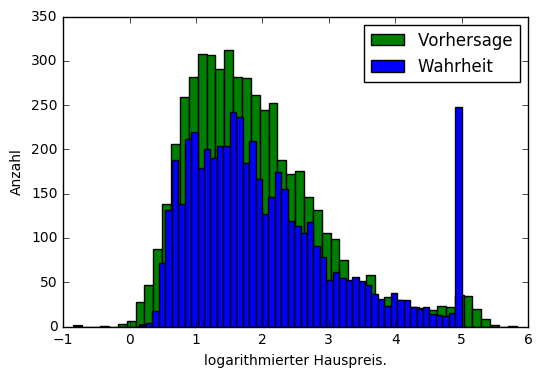

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', SVR(max_iter=5000))
    ])
pipe.fit(Xtrain, ytrain)

prediction = pipe.predict(Xtest)

#Plot der Daten
truth = ytest
if isinstance(prediction, np.ndarray):
    p = plt.hist(prediction, bins=50, color="g", label='Vorhersage')
else:
    p = plt.bar(prediction, 250, width=0.125, color="g", label='Vorhersage')
t = plt.hist(truth, bins=50, color="b", label='Wahrheit')
plt.ylabel("Anzahl")
plt.xlabel("logarithmierter Hauspreis.")
plt.legend()
print("Mittlere absolute Abweichung: {}".format(np.mean(np.abs(prediction - truth))))
print("Mittlere quadratische Abweichung: {}".format(np.mean(np.square(prediction - truth))))

#evaluate(prediction, ytest)

## Weitere Betrachtung:  Zweidimensionale Korrelationen


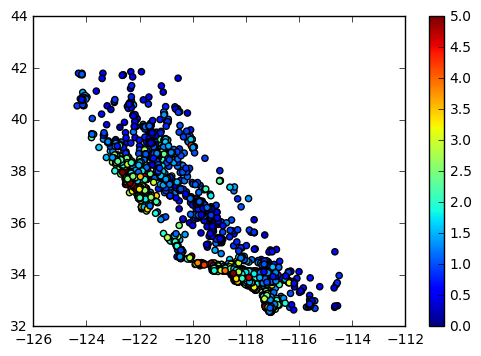

In [27]:
df_file = pd.read_csv("california_housing.csv")
Xtrain = df_file[df_file["sample_id"] == 0].copy()
ytrain = np.asarray(Xtrain["y"]).copy()
del(Xtrain["sample_id"], Xtrain["y"])
Xtest = df_file[df_file["sample_id"] == 1].copy()
ytest = np.asarray(Xtest["y"]).copy()
del(Xtest["sample_id"], Xtest["y"])
#Xtrain, ytrain, Xtest, ytest = load_data()

#from utilities import visualize

#def visualize(geo_prediction):
#Xtrain, ytrain, Xtest, ytest = load_data()
geo_prediction = ytest
x1 = np.asarray(Xtest['Longitude'])
x2 = np.asarray(Xtest['Latitude'])

from matplotlib import colors
cm = plt.cm.get_cmap('RdYlBu')

sc = plt.scatter(x1, x2, c=geo_prediction, s=20, vmin=0, vmax=5)
plt.colorbar(sc)
plt.show()



#visualize(ytest)

## Erweiterung: Separate Regression der Geokoordinaten


In [39]:
from utilities import RegressionOnSubset
from sklearn.neighbors import KNeighborsRegressor

Xtrain, ytrain, Xtest, ytest = load_data()

columns = ["Longitude", "Latitude"]

pipe = Pipeline([
         ('geo_regressor', RegressionOnSubset(
            KNeighborsRegressor(), columns)),
        ('scaler', StandardScaler()),
        ('regressor', SVR(max_iter=5000)),
    ])

pipe.fit(Xtrain, ytrain)


Pipeline(steps=[('geo_regressor', RegressionOnSubset(columns=['Longitude', 'Latitude'],
          subest=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'))), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regressor', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=5000, shrinking=True, tol=0.001, verbose=False))])

### Darstellen der Ergebnisse

In [40]:
Xtrain, ytrain, Xtest, ytest = load_data()
prediction = pipe.predict(Xtest)


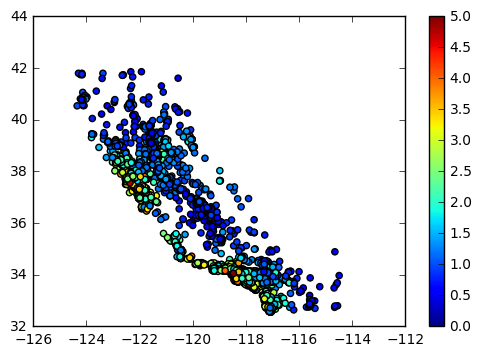

In [41]:
Xtest.head()
visualize(Xtest.knearest)

Mittlere absolute Abweichung: 0.286472579278
Mittlere quadratische Abweichung: 0.206140650893


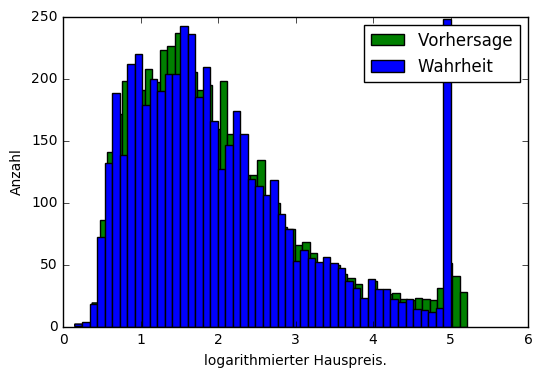

In [42]:
evaluate(prediction, ytest)